#### Section 3

In [21]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo 
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
print(heart_disease.metadata) 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [22]:
target_col = y.columns[0]
df = pd.concat([X, y], axis=1)
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.median(numeric_only=True))
df[target_col] = df[target_col].apply(lambda x: 0 if x == 0 else 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_29188\1500145313.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


#### Section 3.2

In [23]:
X = df.drop(columns=target_col)
y = df[target_col]
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = X_scaled.copy()
df_scaled[target_col] = y
X = df_scaled.drop(columns=target_col)
y = df_scaled[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=242)
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

#### Section 3.2 Evaluation

In [24]:
print("Logistic Regression Report-")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix-")
print(confusion_matrix(y_test, y_pred_log))
print("Random Forest Report-")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix-")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Report-
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix-
[[25  4]
 [ 3 29]]
Random Forest Report-
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion Matrix-
[[27  2]
 [ 6 26]]


#### Section 3.3

In [29]:
chol_target = 'chol'
X_chol = df.drop(columns=[chol_target, target_col])
y_chol = df[chol_target]
scaler = StandardScaler()
X_chol_scaled = pd.DataFrame(scaler.fit_transform(X_chol), columns=X_chol.columns)

#### Section 3.4

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_chol_scaled, y_chol, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("MSE-", mean_squared_error(y_test, y_pred))
print("R^2 Score-", r2_score(y_test, y_pred))

MSE- 3506.0093098082457
R^2 Score- 0.13367645041041698


#### Section 3.5

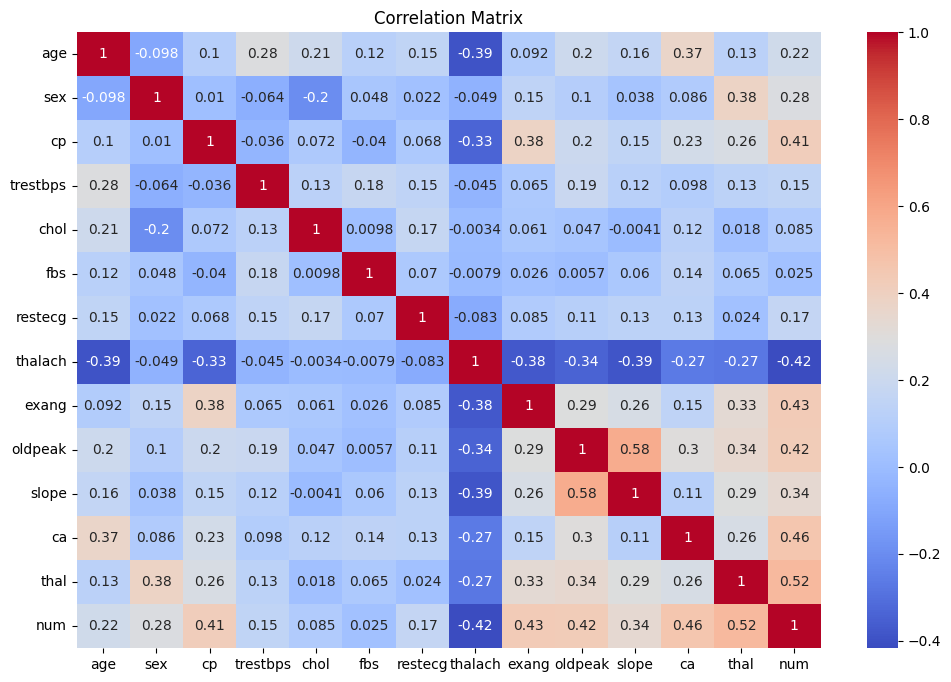

In [27]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()